In [1]:
import matplotlib.pyplot as plt
import matplotlib
import copy
import numpy as np
import xarray as xr
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import cmocean

In [2]:
OM4   = xr.open_dataset('OM4.nc')
OM4CL = xr.open_dataset('OM4CL.nc')

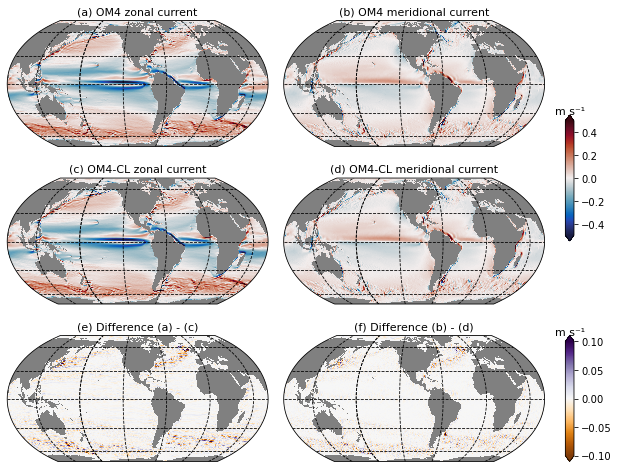

In [3]:
D1=0.55; D2=0.25;

fig=plt.figure(figsize=(12, 7))

projection = ccrs.EqualEarth(central_longitude=-100.0)

ax1 = fig.add_axes([0.05, 0.5+3*0.25/4, D1, D2], projection=projection)
ax2 = fig.add_axes([0.05, 0.25+0.25/2, D1, D2], projection=projection)
ax3 = fig.add_axes([0.05, 0.25/4, D1, D2], projection=projection)
ax4 = fig.add_axes([0.37, 3*0.25/4+0.5, D1, D2], projection=projection)
ax5 = fig.add_axes([0.37, 2*0.25/4+0.25, D1, D2], projection=projection)
ax6 = fig.add_axes([0.37, 0.25/4, D1, D2], projection=projection)

axcb1 = fig.add_axes([0.82, 2*0.25/4+0.25+0.25/2, 0.01, D2])
axcb2 = fig.add_axes([0.82, 0.25/4, 0.01, D2])

cmap = cmocean.cm.balance
cmap.set_bad(alpha=0)

ax=ax1
p=OM4.U.plot(x='geolon', y='geolat',
             vmin=-0.5, vmax=0.5, cmap=cmap,
             transform=ccrs.PlateCarree(),
             add_labels=False,
             add_colorbar=False,
             ax=ax,
             shading="auto",
             rasterized=True,
             zorder=-20
             )
ax.set_title('(a) OM4 zonal current', fontsize=11)

cb = plt.colorbar(p, cax=axcb1, orientation='vertical', extend='both')
cb.ax.set_title(r'm s⁻¹', fontsize=11)

ax=ax2
p=OM4CL.U.plot(x='geolon', y='geolat',
               vmin=-0.5, vmax=0.5, cmap=cmap,
               transform=ccrs.PlateCarree(),
               add_labels=False,
               add_colorbar=False,
               ax=ax,
               shading="auto",
               rasterized=True,
               zorder=-20
               )
ax.set_title('(c) OM4-CL zonal current', fontsize=11)

ax=ax4
p=OM4.V.plot(x='geolon', y='geolat',
             vmin=-0.5, vmax=0.5, cmap=cmap,
             transform=ccrs.PlateCarree(),
             add_labels=False,
             add_colorbar=False,
             ax=ax,
             shading="auto",
             rasterized=True,
             zorder=-20
           )
ax.set_title('(b) OM4 meridional current', fontsize=11)

ax=ax5
p=OM4CL.V.plot(x='geolon', y='geolat',
               vmin=-0.5, vmax=0.5, cmap=cmap,
               transform=ccrs.PlateCarree(),
               add_labels=False,
               add_colorbar=False,
               ax=ax,
               shading="auto",
               rasterized=True,
               zorder=-20
               )
ax.set_title('(d) OM4-CL meridional current', fontsize=11)


cmap = copy.copy(matplotlib.cm.get_cmap("PuOr"))
cmap.set_bad(alpha=0)

ax=ax3
p=(OM4.U-OM4CL.U).plot(x='geolon', y='geolat',
                       vmin=-0.1, vmax=0.1, cmap=cmap,
                       transform=ccrs.PlateCarree(),
                       add_labels=False,
                       add_colorbar=False,
                       ax=ax,
                       shading="auto",
                       rasterized=True,
                       zorder=-20
                       )
ax.set_title('(e) Difference (a) - (c)', fontsize=11)

cb = plt.colorbar(p, cax=axcb2, orientation='vertical', extend='both')
cb.ax.set_title(r'm s⁻¹', fontsize=11)


ax=ax6
p=(OM4.V-OM4CL.V).plot(x='geolon', y='geolat',
                       vmin=-0.1, vmax=0.1, cmap=cmap,
                       transform=ccrs.PlateCarree(),
                       add_labels=False,
                       add_colorbar=False,
                       ax=ax,
                       shading="auto",
                       rasterized=True,
                       zorder=-20
                       )
ax.set_title('(f) Difference (b) - (d)', fontsize=11)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    # ax.coastlines(resolution='auto', color='k', linewidth=0.5)
    ax.set_facecolor('grey')
    ax.gridlines(color='black', linestyle='--')
    # ax.add_feature(cfeature.LAND, facecolor='0.7')
    # ax.add_feature(cfeature.COASTLINE)

fig.savefig('./figure_2.pdf', dpi=320,
            bbox_inches='tight', 
            pad_inches=0.02)

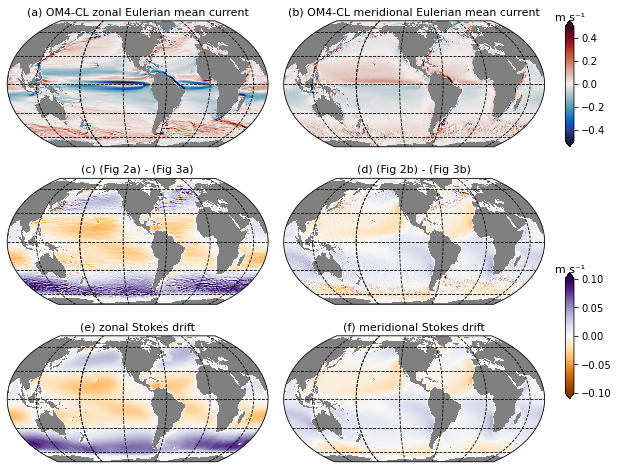

In [4]:
fig=plt.figure(figsize=(12, 7))
D1=0.55; D2=0.25

projection = ccrs.EqualEarth(central_longitude=-100.0)

ax1 = fig.add_axes([0.05, 0.5+3*0.25/4, D1, D2], projection=projection)
ax2 = fig.add_axes([0.05, 0.25+0.25/2, D1, D2], projection=projection)
ax3 = fig.add_axes([0.05, 0.25/4, D1, D2], projection=projection)

ax4 = fig.add_axes([0.37, 3*0.25/4+0.5, D1, D2], projection=projection)
ax5 = fig.add_axes([0.37, 2*0.25/4+0.25, D1, D2], projection=projection)
ax6 = fig.add_axes([0.37, 0.25/4, D1, D2], projection=projection)

axcb1 = fig.add_axes([0.82, 0.5 + 3*0.25/4, 0.01, D2])
axcb2 = fig.add_axes([0.82, 0.25/4 + 0.25/2, 0.01, D2])

cmap = cmocean.cm.balance
cmap.set_bad(alpha=0)

ax=ax1
p=OM4CL.Ue.plot(x='geolon', y='geolat',
                vmin=-0.5, vmax=0.5, cmap=cmap,
                transform=ccrs.PlateCarree(),
                add_labels=False,
                add_colorbar=False,
                ax=ax,
                shading="auto",
                rasterized=True,
                zorder=-20
                )
ax.set_title('(a) OM4-CL zonal Eulerian mean current', fontsize=11)

cb = plt.colorbar(p, cax=axcb1, orientation='vertical', extend='both')
cb.ax.set_title(r'm s⁻¹', fontsize=11)

ax=ax4
p=OM4CL.Ve.plot(x='geolon', y='geolat',
                vmin=-0.5, vmax=0.5, cmap=cmap,
                transform=ccrs.PlateCarree(),
                add_labels=False,
                add_colorbar=False,
                ax=ax,
                shading="auto",
                rasterized=True,
                zorder=-20
                )
ax.set_title('(b) OM4-CL meridional Eulerian mean current', fontsize=11)

cmap = copy.copy(matplotlib.cm.get_cmap("PuOr"))
cmap.set_bad(alpha=0)

ax=ax2
p=(OM4.U-OM4CL.Ue).plot(x='geolon', y='geolat',
                        vmin=-0.1, vmax=0.1, cmap=cmap,
                        transform=ccrs.PlateCarree(),
                        add_labels=False,
                        add_colorbar=False,
                        ax=ax,
                        shading="auto",
                        rasterized=True,
                        zorder=-20
                        )
ax.set_title('(c) (Fig 2a) - (Fig 3a)', fontsize=11)

ax=ax3
p=(OM4CL.Us).plot(x='geolon', y='geolat',
                  vmin=-0.1, vmax=0.1, cmap=cmap,
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False,
                  ax=ax,
                  shading="auto",
                  rasterized=True,
                  zorder=-20
                  )
ax.set_title('(e) zonal Stokes drift', fontsize=11)

cb = plt.colorbar(p, cax=axcb2, orientation='vertical', extend='both')
cb.ax.set_title(r'm s⁻¹', fontsize=11)

ax=ax5
p=(OM4.V-OM4CL.Ve).plot(x='geolon', y='geolat',
                        vmin=-0.1, vmax=0.1, cmap=cmap,
                        transform=ccrs.PlateCarree(),
                        add_labels=False,
                        add_colorbar=False,
                        ax=ax,
                        shading="auto",
                        rasterized=True,
                        zorder=-20
                        )
ax.set_title('(d) (Fig 2b) - (Fig 3b)', fontsize=11)

ax=ax6
p=(OM4CL.Vs).plot(x='geolon', y='geolat',
                  vmin=-0.1, vmax=0.1, cmap=cmap,
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False,
                  ax=ax,
                  shading="auto",
                  rasterized=True,
                  zorder=-20
                  )
ax.set_title('(f) meridional Stokes drift', fontsize=11)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    # ax.coastlines(resolution='auto', color='k', linewidth=0.5)
    ax.set_facecolor('grey')
    ax.gridlines(color='black', linestyle='--')
    # ax.add_feature(cfeature.LAND, facecolor='0.7')
    # ax.add_feature(cfeature.COASTLINE)

fig.savefig('./figure_3.pdf', dpi=320,
            bbox_inches='tight', 
            pad_inches=0.02)